# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
import pandas as pd
from mylib import vn_genome_ids
import matplotlib.pyplot as plt

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [2]:
infile = "data/all.csv"
df = pd.read_csv(infile)
df = df[vn_genome_ids + ['gene']]


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02142,HG01863,HG02026,HG01871,HG02141,HG01873,HG02049,HG02086,HG02113,HG01847
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,7,7,44,9,3,46,10,3,20,...,5,4,20,21,3,4,22,6,4,4
ANG,5,5,4,5,5,3,0,2,0,1,...,2,1,0,2,16,0,5,1,1,3
ATXN2,4,9,7,3,3,1,5,5,1,4,...,3,3,5,17,8,2,11,1,12,4
C9ORF72,13,31,15,32,12,11,12,20,24,23,...,12,12,26,13,12,15,2,11,12,0
CHCHD10,0,1,1,0,0,0,1,1,2,0,...,1,0,0,1,1,2,0,0,1,0


## Compute mean99

In [17]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [18]:
mean99.head()

,0
HG02513,9.161616
HG02138,7.292929
HG02075,11.494949
HG02031,10.747475
HG02084,6.717172


In [20]:
m99 = mean99.transpose()

In [21]:
m99

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02142,HG01863,HG02026,HG01871,HG02141,HG01873,HG02049,HG02086,HG02113,HG01847
0,9.161616,7.292929,11.494949,10.747475,6.717172,6.818182,9.323232,8.0,10.141414,9.828283,...,9.909091,9.545455,8.868687,9.757576,8.161616,5.878788,6.919192,5.464646,6.434343,4.828283


## Name the row "mean99" to append to the dataframe 

In [22]:
m99.index=["mean99"]

In [23]:
m99.head()

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02142,HG01863,HG02026,HG01871,HG02141,HG01873,HG02049,HG02086,HG02113,HG01847
mean99,9.161616,7.292929,11.494949,10.747475,6.717172,6.818182,9.323232,8.0,10.141414,9.828283,...,9.909091,9.545455,8.868687,9.757576,8.161616,5.878788,6.919192,5.464646,6.434343,4.828283


## Compute statistics per genome, across all genes

In [11]:
genome_stats= sdf.describe()

In [12]:
genome_stats.head()

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02142,HG01863,HG02026,HG01871,HG02141,HG01873,HG02049,HG02086,HG02113,HG01847
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,26.676471,21.235294,33.470588,31.294118,19.558824,19.852941,27.147059,23.294118,29.529412,28.617647,...,28.852941,27.794118,25.823529,28.411765,23.764706,17.117647,20.147059,15.911765,18.735294,14.058824
std,76.006667,62.363091,130.932144,89.721633,50.430385,57.445696,60.762894,49.208603,77.124156,101.473094,...,90.288807,73.511813,68.214666,91.596651,75.257159,40.288930,69.327126,47.584927,38.032131,36.236547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000,2.250000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.250000,1.000000,1.250000,1.000000,1.000000,1.250000,1.000000,1.000000,1.000000,1.000000


### Adding new rows for genomes to show variant statistics

In [24]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [25]:
genome_stats_df

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02142,HG01863,HG02026,HG01871,HG02141,HG01873,HG02049,HG02086,HG02113,HG01847
ALS2,3.000000,7.000000,7.000000,44.000000,9.000000,3.000000,46.000000,10.000000,3.000000,20.000000,...,5.000000,4.000000,20.000000,21.000000,3.000000,4.000000,22.000000,6.000000,4.000000,4.000000
ANG,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,16.000000,0.000000,5.000000,1.000000,1.000000,3.000000
ATXN2,4.000000,9.000000,7.000000,3.000000,3.000000,1.000000,5.000000,5.000000,1.000000,4.000000,...,3.000000,3.000000,5.000000,17.000000,8.000000,2.000000,11.000000,1.000000,12.000000,4.000000
C9ORF72,13.000000,31.000000,15.000000,32.000000,12.000000,11.000000,12.000000,20.000000,24.000000,23.000000,...,12.000000,12.000000,26.000000,13.000000,12.000000,15.000000,2.000000,11.000000,12.000000,0.000000
CHCHD10,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000
CHMP2B,10.000000,0.000000,2.000000,8.000000,6.000000,9.000000,12.000000,16.000000,13.000000,4.000000,...,8.000000,6.000000,4.000000,4.000000,9.000000,10.000000,5.000000,1.000000,2.000000,5.000000
CHRNA3,24.000000,7.000000,30.000000,18.000000,18.000000,5.000000,20.000000,27.000000,38.000000,24.000000,...,19.000000,18.000000,20.000000,13.000000,17.000000,17.000000,16.000000,13.000000,15.000000,1.000000
CREST,89.000000,3.000000,1.000000,2.000000,91.000000,2.000000,85.000000,85.000000,87.000000,3.000000,...,94.000000,1.000000,88.000000,88.000000,4.000000,89.000000,5.000000,3.000000,89.000000,2.000000
DAO,3.000000,3.000000,9.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000,8.000000
DCTN1,5.000000,2.000000,2.000000,0.000000,4.000000,2.000000,0.000000,5.000000,2.000000,1.000000,...,6.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000


### Compute per gene stats

In [29]:
gene_df = sdf.transpose().describe()

In [30]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,99.0,15.101010,13.522087,1.0,4.0,9.0,22.0,62.0
ANG,99.0,2.111111,2.551066,0.0,0.0,1.0,3.5,16.0
ATXN2,99.0,5.959596,4.591294,0.0,3.0,5.0,8.0,20.0
C9ORF72,99.0,15.979798,9.584192,0.0,11.0,14.0,23.0,35.0
CHCHD10,99.0,0.494949,0.628794,0.0,0.0,0.0,1.0,3.0
CHMP2B,99.0,7.878788,4.324285,0.0,5.0,8.0,10.0,17.0
CHRNA3,99.0,19.434343,9.221937,0.0,15.0,19.0,24.0,38.0
CREST,99.0,39.737374,42.483030,0.0,2.0,11.0,88.0,103.0
DAO,99.0,3.171717,2.703137,0.0,1.0,2.0,4.0,11.0


In [31]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [32]:
rdf.head()

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02113,HG01847,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,7,7,44,9,3,46,10,3,20,...,4,4,99.0,15.101010,13.522087,1.0,4.0,9.0,22.0,62.0
ANG,5,5,4,5,5,3,0,2,0,1,...,1,3,99.0,2.111111,2.551066,0.0,0.0,1.0,3.5,16.0
ATXN2,4,9,7,3,3,1,5,5,1,4,...,12,4,99.0,5.959596,4.591294,0.0,3.0,5.0,8.0,20.0
C9ORF72,13,31,15,32,12,11,12,20,24,23,...,12,0,99.0,15.979798,9.584192,0.0,11.0,14.0,23.0,35.0
CHCHD10,0,1,1,0,0,0,1,1,2,0,...,1,0,99.0,0.494949,0.628794,0.0,0.0,0.0,1.0,3.0


In [33]:
rdf

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02113,HG01847,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,7,7,44,9,3,46,10,3,20,...,4,4,99.0,15.101010,13.522087,1.0,4.0,9.0,22.0,62.0
ANG,5,5,4,5,5,3,0,2,0,1,...,1,3,99.0,2.111111,2.551066,0.0,0.0,1.0,3.5,16.0
ATXN2,4,9,7,3,3,1,5,5,1,4,...,12,4,99.0,5.959596,4.591294,0.0,3.0,5.0,8.0,20.0
C9ORF72,13,31,15,32,12,11,12,20,24,23,...,12,0,99.0,15.979798,9.584192,0.0,11.0,14.0,23.0,35.0
CHCHD10,0,1,1,0,0,0,1,1,2,0,...,1,0,99.0,0.494949,0.628794,0.0,0.0,0.0,1.0,3.0
CHMP2B,10,0,2,8,6,9,12,16,13,4,...,2,5,99.0,7.878788,4.324285,0.0,5.0,8.0,10.0,17.0
CHRNA3,24,7,30,18,18,5,20,27,38,24,...,15,1,99.0,19.434343,9.221937,0.0,15.0,19.0,24.0,38.0
CREST,89,3,1,2,91,2,85,85,87,3,...,89,2,99.0,39.737374,42.483030,0.0,2.0,11.0,88.0,103.0
DAO,3,3,9,2,2,3,2,4,3,1,...,0,8,99.0,3.171717,2.703137,0.0,1.0,2.0,4.0,11.0


# Plot bar chart of total variant counts per gene


In [34]:
infile = "data/all.csv"
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [35]:
gdf=df.groupby(["gene"]).count()

In [36]:
gdf

,POS
gene,
ALS2,191
ANG,40
ATXN2,223
C9ORF72,98
CHCHD10,8
CHMP2B,72
CHRNA3,114
CREST,198
DAO,48


In [37]:
gdf.reset_index(inplace=True)

In [38]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [48]:
gdf

,gene,variant_count
0,ERBB4,4285
1,NEK1,712
2,FIG4,415
3,SETX,313
4,SPG11,305
5,ELP3,284
6,ATXN2,223
7,CREST,198
8,VAPB,192
9,ALS2,191


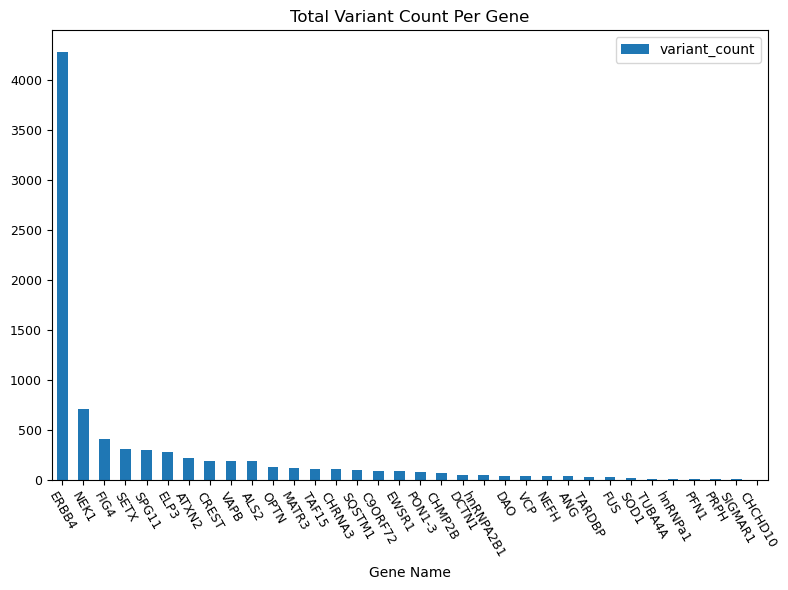

In [41]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [42]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [43]:
infile = "data/all.csv"
df = pd.read_csv(infile)
df = df[vn_genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [48]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [49]:
hdf.reset_index(inplace=True)

In [50]:
hdf.head()

,index,count
0,HG02513,907
1,HG02138,722
2,HG02075,1138
3,HG02031,1064
4,HG02084,665


In [47]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(886.6262626262626), 215.18205798520157)

## Find top and bottom genomes using mean & STD

In [54]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [55]:
len(top_genomes)

18

In [56]:
len(bottom_genomes)

17

In [57]:
infile = "data/all.csv"
df = pd.read_csv(infile)
df = df[vn_genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [58]:
sdf.head()

,HG02513,HG02138,HG02075,HG02031,HG02084,HG02047,HG01597,HG01849,HG02023,HG01846,...,HG02142,HG01863,HG02026,HG01871,HG02141,HG01873,HG02049,HG02086,HG02113,HG01847
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,7,7,44,9,3,46,10,3,20,...,5,4,20,21,3,4,22,6,4,4
ANG,5,5,4,5,5,3,0,2,0,1,...,2,1,0,2,16,0,5,1,1,3
ATXN2,4,9,7,3,3,1,5,5,1,4,...,3,3,5,17,8,2,11,1,12,4
C9ORF72,13,31,15,32,12,11,12,20,24,23,...,12,12,26,13,12,15,2,11,12,0
CHCHD10,0,1,1,0,0,0,1,1,2,0,...,1,0,0,1,1,2,0,0,1,0


In [59]:
tgdf= sdf.loc[top_genes]

In [60]:
tgdf_top_genomes = tgdf[top_genomes]

In [61]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [62]:
tgdf_top_genomes.head()

,HG02075,HG02064,HG02087,HG01864,HG01872,HG01845,HG02067,HG02127,HG02078,HG02116,HG01842,HG01869,HG02048,HG01858,HG02131,HG02025,HG01852,HG02137
gene,,,,,,,,,,,,,,,,,,
ERBB4,770,737,688,687,578,871,482,823,687,611,725,609,667,763,658,739,493,689
NEK1,13,4,211,190,193,4,190,8,233,184,234,186,193,188,188,189,209,187
FIG4,25,60,34,60,73,12,44,21,20,43,84,32,83,39,58,27,56,4
SETX,54,27,19,39,30,68,51,40,27,8,53,51,63,50,49,52,25,37
SPG11,3,91,50,5,94,59,117,89,58,51,2,5,3,57,4,6,56,60


In [64]:
tgdf_bot_genomes.head()

,HG02084,HG02017,HG01868,HG01596,HG02072,HG01600,HG02020,HG02060,HG01861,HG02130,HG01595,HG02139,HG02522,HG01873,HG02086,HG02113,HG01847
gene,,,,,,,,,,,,,,,,,
ERBB4,224,241,253,171,253,298,207,187,174,291,282,299,293,224,269,173,204
NEK1,189,10,19,9,4,6,9,6,6,39,4,7,6,10,7,10,8
FIG4,4,69,39,19,42,4,53,17,44,60,52,73,12,37,78,22,42
SETX,4,41,8,7,23,27,64,26,10,7,25,53,55,32,51,37,42
SPG11,1,4,58,2,59,49,52,95,94,4,4,6,59,5,6,129,59


## Plot stacked bar chart for top genes & top genomes

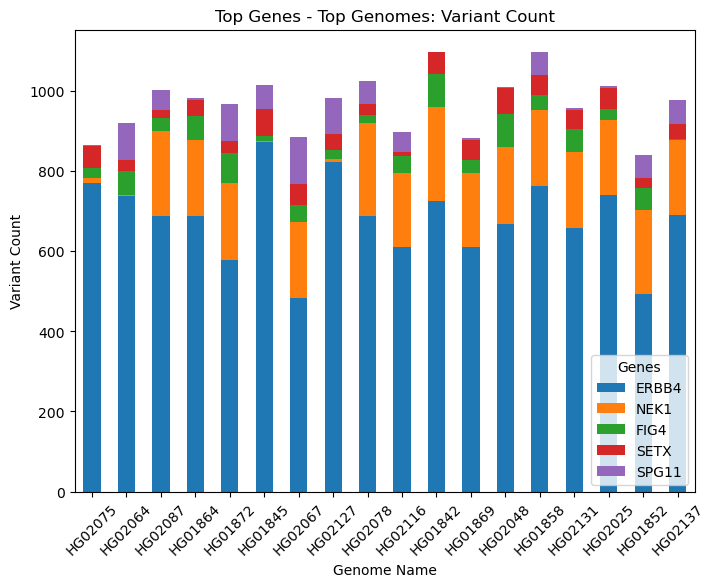

In [72]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

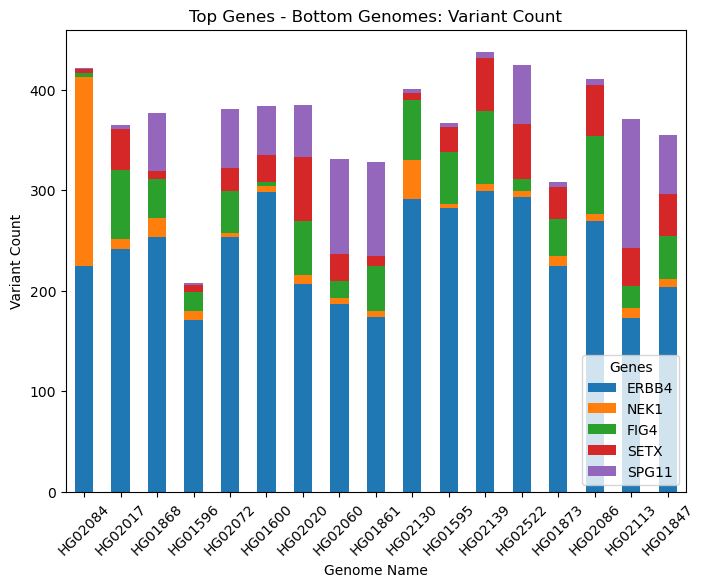

In [74]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()